In [2]:
# Import essential libraries to build model and data processing.
import numpy as np          # for numerical operations.
import pandas as pd         #data manipulation library that provides data structures like dataframes.
import os                   # intrect with the operating system.
import cv2                  # for(open cv)image processing.
import glob                 # The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell.
import matplotlib.pyplot as plt  # Matplotlib plotting library.
import sklearn              #  for data analysis and modeling.
import seaborn as sns        # data visualization library
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split  #'train_test_split' function from scikit-learn,  for splitting datasets into training and testing sets.
import random
from PIL import Image

In [3]:
import torch                                 # PyTorch, an open-source deep learning framework.
import torchvision.transforms as transforms  # Part of the torchvision library, providing common image transformations.
import torchvision                           # A PyTorch library for computer vision tasks.
import torch.nn.functional as F              # Functional operations on tensors, often used in neural network layers.
from torch import nn                         # The neural network module in PyTorch, which includes predefined layers and modules.
from torchvision import datasets, transforms, models  # Specific modules within torchvision for working with datasets, transformations, and pre-trained models.
from torch import optim                       # PyTorch's module for optimization algorithms (e.g., SGD, Adam).
from torch.autograd import Variable           # Part of PyTorch's autograd package, used for automatic differentiation.
import torch.utils.data as data_utils         # Utilities for handling data in PyTorch.
from torch.utils.data import DataLoader, Dataset  # DataLoader for efficiently loading and batching data, and Dataset for creating custom datasets in PyTorch.


In [4]:
#This code is checking if a CUDA-enabled GPU is available, and if so, it sets the device to "cuda"; otherwise, it sets the device to "cpu".

device  = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [5]:
# mount the google drive where the data is stored.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#
data = '/content/drive/MyDrive/dataset2'
ext = ['png', 'jpg', 'jpeg']

In [7]:
# Print the first image name in the folder.
image_name = os.listdir(data)
print(len(image_name))
print(image_name[0])

1125
cloudy239.jpg


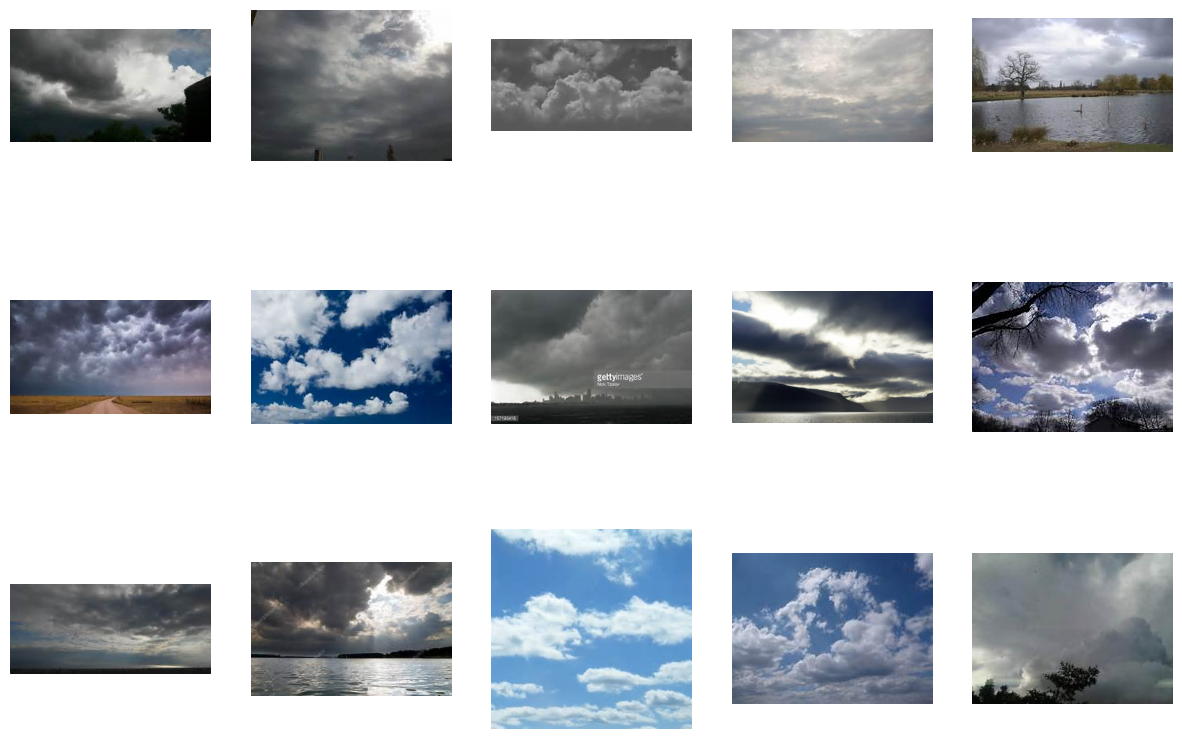

In [8]:

fig, axes = plt.subplots(3, 5, figsize=(15, 10))

# Loop through the axes and display each image
for i, ax in enumerate(axes.flatten()):
    # Load and display the image
    img_path = os.path.join(data, image_name[i])
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

# Show the plot
plt.show()

In [9]:

def generate_label(target, ext):
  '''it will remove the extension of the image and
  numeric values present in image name to create the label'''
  df = pd.DataFrame(target, columns = ['label'])
  for e in ext:
    df['label'] = df['label'].str.rstrip('.' + e)
  df['label'] = df['label'].str.replace('\d+', '')
  return df

 the generate_label function takes a list of file names (target) and a list of file extensions (ext). It creates a DataFrame, removes file extensions and numeric values from the 'label' column, and returns the resulting DataFrame. The function is designed to clean up file names and create a 'label' column that can be used for further processing or analysis.

In [10]:
df_label = generate_label(image_name, ext)

<ipython-input-9-7edaba476a1a>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['label'] = df['label'].str.replace('\d+', '')


This code assumes that your df_image dataframe is defined, and df_label now contains the cleaned-up labels. Make sure to run these steps in sequence, and if you encounter any issues or have further questions, feel free to ask!

In [11]:
def get_image(data, image_name):
  '''it will read the images and stored it inside dataframe.'''
  files = []
  [files.extend(glob.glob(data +  '/' + e)) for e in image_name]
  images = [cv2.imread(file) for file in files]
  df_image = pd.DataFrame(images, columns=['image'])
  return df_image

Function Signature:

def get_image(data, image_name):: This defines a function named get_image that takes two parameters, data (directory path) and image_name (list of image file names).
List of File Paths:

[files.extend(glob.glob(data + '/' + e)) for e in image_name]: This line uses a list comprehension to iterate over each image name in image_name, combines it with the data directory path, and uses glob.glob to create a list of file paths. The files.extend() method is used to append the file paths to the files list.
Read Images using OpenCV:

images = [cv2.imread(file) for file in files]: This line uses a list comprehension to read each image file using cv2.imread and stores the images in a list.
Create DataFrame:

df_image = pd.DataFrame(images, columns=['image']): This line creates a DataFrame named df_image with a single column named 'image', where each row contains an image.
Return the Resulting DataFrame:

return df_image: The function returns the DataFrame containing the images.
You can use this function to read images and store them in a DataFrame by calling it with the appropriate parameters, like so:

In [12]:
df_image = get_image(data, image_name)


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [13]:
# replace the labels with numeric values and indexing start from the 0 and concat the two dataframe in one.
df_label['label'] = df_label['label'].map( {'cloudy':0 , 'shine':1, 'rain':2, 'sunrise':3} )
weather_data = pd.concat([df_image, df_label], axis = 1)
weather_data

,image,label
0,"[[[57, 58, 56], [57, 58, 56], [57, 58, 56], [5...",0
1,"[[[21, 37, 44], [37, 53, 60], [11, 22, 30], [1...",0
2,"[[[98, 98, 98], [98, 98, 98], [98, 98, 98], [9...",0
3,"[[[168, 166, 165], [167, 165, 164], [166, 164,...",0
4,"[[[155, 132, 130], [156, 133, 131], [158, 135,...",0
...,...,...
1120,"[[[55, 55, 55], [55, 55, 55], [55, 55, 55], [5...",0
1121,"[[[189, 189, 189], [65, 65, 65], [66, 66, 66],...",0
1122,"[[[64, 48, 31], [63, 47, 30], [62, 46, 29], [6...",0
1123,"[[[151, 125, 108], [152, 126, 109], [152, 126,...",0


In [14]:
weather_data.isnull().sum() #check the null values

image    2
label    0
dtype: int64

In [15]:
weather_data = weather_data.dropna()  #drop the null values


In [16]:
weather_data.isnull().sum()  # recheck

image    0
label    0
dtype: int64

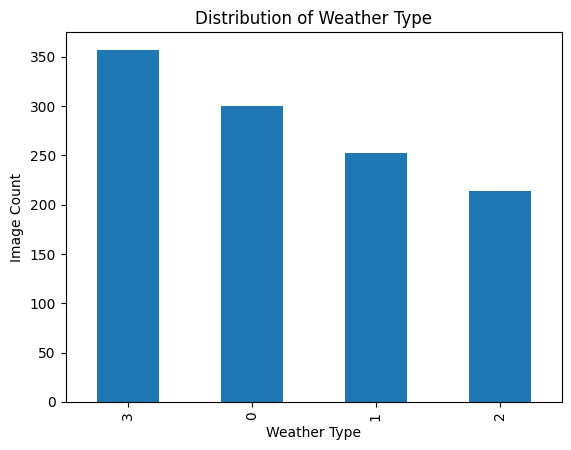

In [17]:
# visual representaion of all the classes where 0 is cloudy, 1 shine, 2 rain, 3 sunrise.
ax = weather_data['label'].value_counts().plot(kind='bar')
ax.set_xlabel("Weather Type")
ax.set_ylabel("Image Count")
ax.title.set_text("Distribution of Weather Type")

In [18]:
train_data, test_data = train_test_split(weather_data,test_size=0.10)
train_data, valid_data = train_test_split(train_data,test_size=0.15)
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(858, 2)
(152, 2)
(113, 2)


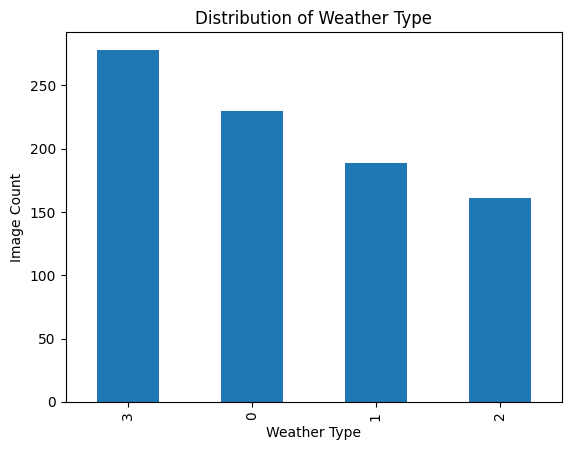

In [19]:
ax = train_data['label'].value_counts().plot(kind='bar')
ax.set_xlabel("Weather Type")
ax.set_ylabel("Image Count")
ax.title.set_text("Distribution of Weather Type")

In [20]:
image_aug = train_data[train_data['label'] == 2]

In [21]:
def image_augmentation(dataframe):
  for i in range (len(dataframe.index)):
    dataframe.image.iloc[i] = cv2.flip(dataframe.image.iloc[i], 1)
  return dataframe

In [22]:
data_image_augment = image_augmentation(image_aug)

<ipython-input-21-2d6b751f096f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.image.iloc[i] = cv2.flip(dataframe.image.iloc[i], 1)


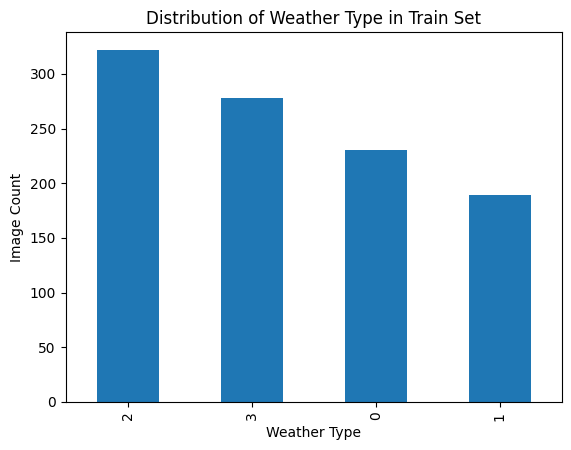

In [23]:
train_data_aug = pd.concat([train_data, data_image_augment])
ax = train_data_aug['label'].value_counts().plot(kind='bar')
ax.set_xlabel("Weather Type")
ax.set_ylabel("Image Count")
ax.title.set_text("Distribution of Weather Type in Train Set")

In [24]:
class ImageDataset(Dataset):
  def __init__(self, dataframe, transform):
    self.dataframe = dataframe
    self.transform=transform
    self.image=self.dataframe['image']
    self.labels=np.array(self.dataframe['label'])

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self,index):

    image=self.transform(self.image.iloc[index])
    targets=self.labels[index]
    sample = {'image': image,'labels':targets}
    return sample

In [25]:
train_transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((224, 224)),   #the resnet takes the input as 224*224pixles.
                transforms.RandomRotation(degrees=45),   # to see the image from the diff angle to improve prediction.
                transforms.ColorJitter(),    #improve the brightness, contrasts to make better prediction
                transforms.ToTensor()])

valid_transform =transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((224, 224)),
                transforms.ToTensor()])

test_transform =transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((224, 224)),
                transforms.ToTensor()])

train_dataset=ImageDataset(train_data_aug, train_transform)
valid_dataset=ImageDataset(valid_data, valid_transform)
test_dataset=ImageDataset(test_data, test_transform)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=8,
    shuffle=True
)

valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=4,
    shuffle=True
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=4,
    shuffle=True
)

In [26]:
#Loading Pre-trained ResNet18:
class resnet18_model(nn.Module):
    def __init__(self):
        super(resnet18_model, self).__init__()
        self.model = models.resnet18(pretrained=True)
        for param in self.model.parameters():
            param.requires_grad = False    #freeze the parameters because it do not change during training
        classifier = nn.Sequential(
                     nn.Linear(self.model.fc.in_features,1024),   #  taking 1024 features and, taking input from Resnet18
                     nn.Dropout(p = 0.3),    #drop the 30% of the neurons, so it do not overfit the model
                     nn.ReLU(),            #activation function to into non-linearity to function.
                     nn.Linear(1024,512),    #second layer start with it takes 1024 features from 1 layer and gives 512 features output
                     nn.Dropout(p = 0.2),   #drop the 20% of the neurons to reduce overfitting
                     nn.ReLU(),            #activation in layer 2
                     nn.Linear(512, 4),     #in the third layertake 512 features from layer 2 and gives the 4 (your class) output.
                     nn.LogSoftmax(dim = 1))   # in the output layer provides algo. of class probability
        self.model.fc = classifier


    def forward(self, image): #
        x = self.model(image)
        return x


model = resnet18_model()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001, weight_decay = 3e-5)   #adam set to default
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 165MB/s]


resnet18_model(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [27]:
def fit(n_epochs,
        model,
        device,
        train_loader,
        valid_loader,
        criterion,
        optimizer):
    '''It will perform model training and validation.'''
    epochs = n_epochs
    history = []
    valid_loss_min = np.Inf
    for epoch in range(epochs):
        running_loss = 0
        valid_loss = 0
        train_acc = 0
        valid_acc = 0

        # Model Training
        for sample in train_loader:
            images = sample['image']
            labels = sample['labels']
            # data and target value on device either a CPU or GPU.
            images = images.to(device=device, dtype = torch.float)
            labels = labels.to(device=device, dtype = torch.long)
            # Clear gradients
            optimizer.zero_grad()
            # Predicted images outputs
            outputs = model(images)
            #calculate the loss between prediction and target values
            loss = criterion(outputs, labels)
            #backpropogation of gradients
            loss.backward()
            #update the parameter
            optimizer.step()
            # Store the loss in variable
            running_loss += loss.item()
            # model's prediction using the max probability
            _, pred = torch.max(outputs, dim=1)
            correct_tensor = pred.eq(labels.data.view_as(pred))
            #convert the tensor
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            #track the accuracy
            train_acc += accuracy.item()

        # Validation Model
        # Don't need to keep track of gradients
        with torch.no_grad():
            # set model to evaluate model
            model.eval()
            for sample in valid_loader:
                images = sample['image']
                labels = sample['labels']
                # data and target on deivece and datatype decision
                images = images.to(device=device, dtype = torch.float)
                labels = labels.to(device=device, dtype = torch.long)
                #prediction of the model
                output = model(images)
                #calculate valid loss
                valid_loss += criterion(output, labels)
                #calculate the accuracy and convert the type
                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(labels.data.view_as(pred))
                accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
                #calculate accuracy to keet track
                valid_acc += accuracy.item()
            #store loss and accuracy in list
            history.append([running_loss /
                            len(train_loader), train_acc /
                            len(train_loader), valid_loss /
                            len(valid_loader), valid_acc /
                            len(valid_loader), epoch])
            # save the model if valid loss decrease
            if valid_loss <= valid_loss_min:
                torch.save(model.state_dict(), 'best_model_weather.pth')
                valid_loss_min = valid_loss
    return model, history

In [28]:
model, history = fit(10, model, device, train_dataloader, valid_dataloader, criterion, optimizer)  # Number of epoch in the model for training

In [29]:
train_history = pd.DataFrame(history, columns = ['train_loss', 'train_acc', 'valid_loss', 'valid_acc', 'epoch']) #sve the history of the model in history

In [30]:
def training_loss_performance(dataframe: pd.DataFrame):
    '''It used the history generated from the training to plot the train vs valid loss.'''
    plt.plot(dataframe['epoch'], dataframe['train_loss'], 'r', label='Training loss')
    plt.plot(dataframe['epoch'], dataframe['valid_loss'], 'b', label='Validation loss')
    plt.title('Training and Validation loss for ResNet18')
    plt.legend()
    plt.show()

def train_acc_performance(dataframe: pd.DataFrame):
    '''It used the history generated from the training to plot the train vs valid accuracy.'''
    plt.plot(dataframe['epoch'], dataframe['train_acc'], 'r', label='Training acc')
    plt.plot(dataframe['epoch'], dataframe['valid_acc'], 'b', label='Validation acc')
    plt.title('Training and Validation Accuracy For ResNet18')
    plt.legend()
    plt.show()

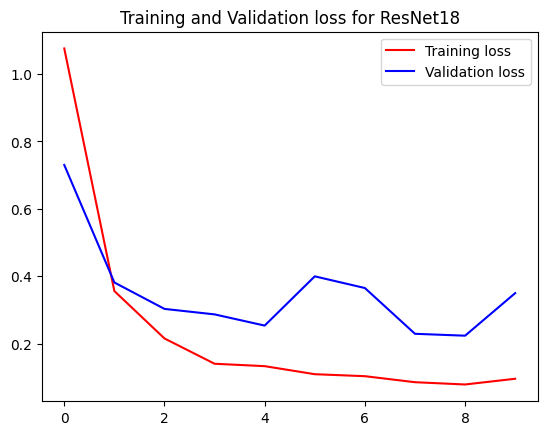

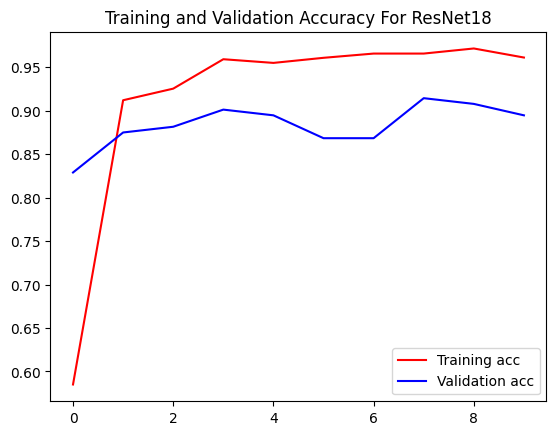

In [31]:
training_loss_performance(train_history)#print the trining nd the vlidtion loss of the resnet18
train_acc_performance(train_history) #print the accuracy of the model

In [32]:
def evaluation(device,
               model,
               test_loader):
    '''It will perform model testing and store the actual target and predicted result into list.'''
    model.eval()
    fin_targets = []
    fin_outputs = []
    with torch.no_grad():
        for sample in test_loader:
            images = sample['image']
            labels = sample['labels']
            images = images.to(device=device, dtype=torch.float)
            labels = labels.to(device=device, dtype=torch.long)
            output = model(images)
            _, output = torch.max(output, dim=1)
            fin_targets.extend(labels.cpu().detach().numpy().tolist())
            fin_outputs.extend(output.cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [33]:
outputs, targets = evaluation(device, model, test_dataloader)

In [34]:
print(sklearn.metrics.classification_report(outputs, targets))   #print the classification metrics

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        26
           1       0.88      0.88      0.88        25
           2       1.00      0.76      0.86        25
           3       0.97      0.97      0.97        37

    accuracy                           0.89       113
   macro avg       0.90      0.88      0.89       113
weighted avg       0.91      0.89      0.89       113



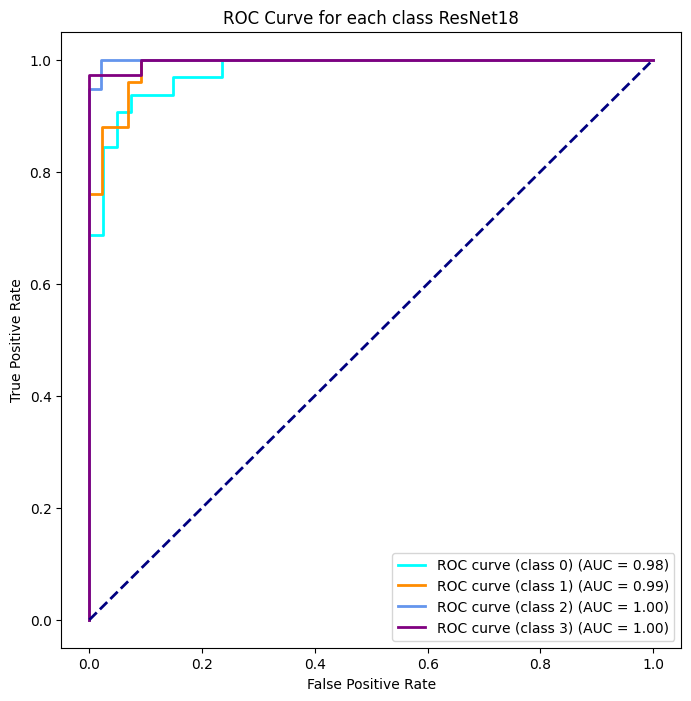

In [35]:
model.eval()  # print the roc-auc curve for the each class so here we have the 4 classes

all_labels = []
all_probs = []


with torch.no_grad():
    for sample in test_dataloader:
        images = sample['image'].to(device)
        labels = sample['labels'].to(device)
        outputs = model(images)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = 4   # give the number of the classes


from sklearn.preprocessing import label_binarize
all_labels_binarized = label_binarize(all_labels, classes=range(num_classes))


for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 8))

# Define colors for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'purple'][:num_classes]

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class ResNet18')
plt.legend(loc='lower right')
plt.show()


In [36]:
ckpt = torch.load('best_model_weather.pth')  # take the best model for the prediction

In [37]:
def imshow(image, ax=None, title=None, normalize=False):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))
    ax.imshow(image)
    ax.spines['top'].set_visible(False)   #remove the border of the images to make predictions by using the spines from all the sides
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

tensor([0], device='cuda:0')


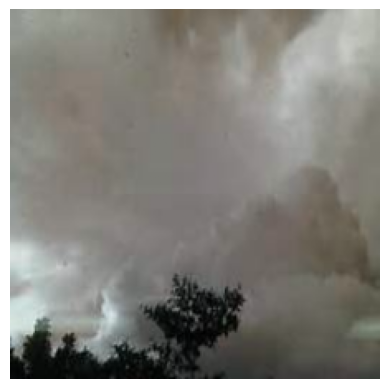

In [38]:
sample = next(iter(test_dataloader))
images = sample['image']
targets = sample['labels']
a1 = imshow(images[0])
images, labels = images.to(device), targets.to(device)
img = images[0].view(1,3,224,224)

with torch.no_grad():
    model = model.to(device)
    logits = model(img)

_, output = torch.max(logits, dim=1)
print(output)


tensor([2], device='cuda:0')


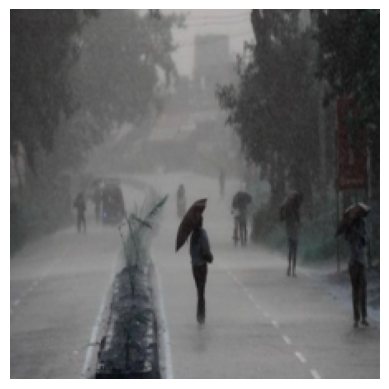

In [39]:
sample = next(iter(test_dataloader))
images = sample['image']
targets = sample['labels']
a1 = imshow(images[1])
images, labels = images.to(device), targets.to(device)
img = images[1].view(1,3,224,224)

with torch.no_grad():
    model = model.to(device)
    logits = model(img)

_, output = torch.max(logits, dim=1)
print(output)
